In [2]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_cols = diabetes.feature_names
X_scaled = scaler.fit_transform(data[scale_cols])
print(X_scaled)

Y = data['target'].values

[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41855058
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43655059
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06020733
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98558469
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93615545
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08871747
   0.06442552]]


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_re, y_train, y_re = train_test_split(X_scaled, Y, shuffle=True, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_re, y_re, shuffle=True, test_size=0.5)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(353, 10)
(44, 10)
(45, 10)
(353,)
(44,)
(45,)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(50, activation='elu', input_shape=(10,)))
model.add(Dense(30, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=1, verbose=1)

Train on 353 samples, validate on 44 samples
Epoch 1/100
353/353 [==============================] - 2s 6ms/sample - loss: 21771.5662 - mae: 127.5284 - val_loss: 8483.5899 - val_mae: 72.1397
Epoch 2/100
353/353 [==============================] - 1s 2ms/sample - loss: 3948.5009 - mae: 49.3029 - val_loss: 4006.3491 - val_mae: 51.0636
Epoch 3/100
353/353 [==============================] - 1s 2ms/sample - loss: 2968.7537 - mae: 43.6984 - val_loss: 3890.1893 - val_mae: 49.8039
Epoch 4/100
353/353 [==============================] - 1s 2ms/sample - loss: 2900.8208 - mae: 43.1571 - val_loss: 3839.8946 - val_mae: 48.8796
Epoch 5/100
353/353 [==============================] - 1s 2ms/sample - loss: 2891.1902 - mae: 43.4971 - val_loss: 3821.1730 - val_mae: 48.6871
Epoch 6/100
353/353 [==============================] - 1s 2ms/sample - loss: 2868.9940 - mae: 42.4255 - val_loss: 3828.4284 - val_mae: 48.6537
Epoch 7/100
353/353 [==============================] - 1s 2ms/sample - loss: 2822.1734 - mae: 4

353/353 [==============================] - 1s 2ms/sample - loss: 2353.9572 - mae: 38.3284 - val_loss: 4382.7646 - val_mae: 51.2568
Epoch 58/100
353/353 [==============================] - 1s 2ms/sample - loss: 2318.1115 - mae: 37.7603 - val_loss: 4333.3759 - val_mae: 50.6329
Epoch 59/100
353/353 [==============================] - 1s 2ms/sample - loss: 2311.5137 - mae: 38.1635 - val_loss: 4366.1189 - val_mae: 51.4072
Epoch 60/100
353/353 [==============================] - 1s 2ms/sample - loss: 2344.6006 - mae: 37.6928 - val_loss: 4398.9432 - val_mae: 50.6362
Epoch 61/100
353/353 [==============================] - 1s 2ms/sample - loss: 2284.7790 - mae: 37.4267 - val_loss: 4578.4675 - val_mae: 51.9341
Epoch 62/100
353/353 [==============================] - 1s 2ms/sample - loss: 2310.9020 - mae: 37.7024 - val_loss: 4471.5179 - val_mae: 52.0249
Epoch 63/100
353/353 [==============================] - 1s 2ms/sample - loss: 2305.3105 - mae: 37.6090 - val_loss: 4429.1680 - val_mae: 51.4344
Epoch

In [21]:
evaluate = model.evaluate(x_test, y_test, batch_size=1, verbose=2)
evaluate

45/1 - 0s - loss: 4550.8318 - mae: 40.1986


[2703.6972588459653, 40.198555]

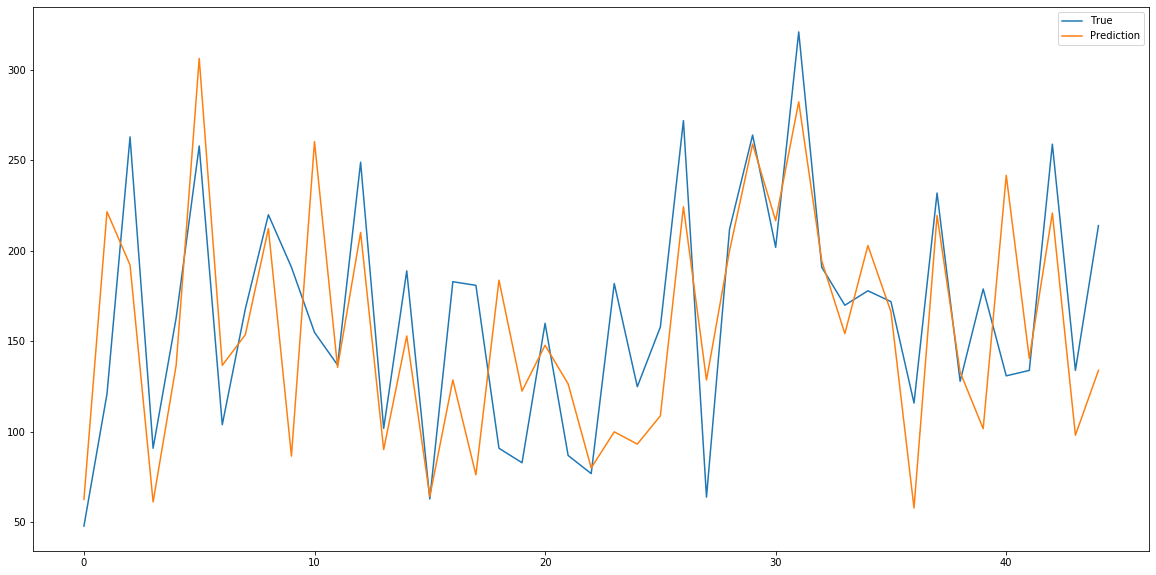

In [23]:
import matplotlib.pyplot as plt
predict = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(predict, label='Prediction')
ax.legend()
plt.show()